In [1]:
import yaml
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
path = "/work/westgroup/ChrisB/_01_MeOH_repos/uncertainty_analysis/"
if path not in sys.path: 
    sys.path.append("/work/westgroup/ChrisB/_01_MeOH_repos/uncertainty_analysis/")
from rmg_gua.gua_cantera.Spinning_basket_reactor.sbr import MinSBR


In [2]:
expt_condts = f"{path}rmg_gua/gua_cantera/all_experiments_reorg_sbr.yaml"
with open(expt_condts, "r") as f: 
    data = yaml.safe_load(f)
conditions = data[73]

In [3]:
conditions["volume_flowrate"]

FC_temp = 293.15
conditions["molar_flow"] = conditions["volume_flowrate"] * 1.01325e5 / (8.3145 * FC_temp) 

In [4]:
conditions["molar_flow"] 

0.0002860085488581988

In [5]:
conditions["volume_flowrate"]

6.879999999999999e-06

In [6]:
cti_file = f"{path}rmg_gua/baseline/cantera/chem_annotated.cti"

reactor = MinSBR(
    cti_file,
    conditions,
    reactor_type =3,
    time=600, 
)

In [11]:
time = 0.1
times = np.logspace(-8, -1, num=100)

In [12]:
results = {}
for time in times: 
    reactor.sim.advance(time)
    for i in range(0, len(reactor.gas.X)):
        if reactor.gas.species_names[i] not in results.keys():
            results[reactor.gas.species_names[i]] = [reactor.gas.X[i]]
        else: 
            results[reactor.gas.species_names[i]].append(reactor.gas.X[i])
    for i in range(0, len(reactor.surf.X)):
        if reactor.surf.species_names[i] not in results.keys():
            results[reactor.surf.species_names[i]] = [reactor.surf.X[i]]
        else: 
            results[reactor.surf.species_names[i]].append(reactor.surf.X[i])

In [13]:
results.keys()

dict_keys(['N2', 'Ne', 'H2(2)', 'CO(3)', 'CO2(4)', 'H2O(5)', 'CH2O(6)', 'HCOOH(7)', 'CH3OH(8)', 'HCOOCH3(9)', 'CH4(32)', 'X(1)', 'H*(10)', 'O*(11)', 'OH*(12)', 'H2O*(13)', 'CO*(14)', 'CO2*(15)', 'HCO*(16)', 'HCOO*(17)', 'COOH*(18)', 'HCOOH*(19)', 'CH2O*(20)', 'CH3O*(21)', 'CH3O2*(22)', 'CH3OH*(23)', 'CH3X(33)', 'CH3OX(49)'])

## plot gases: 

Text(0, 0.5, 'mole fraction')

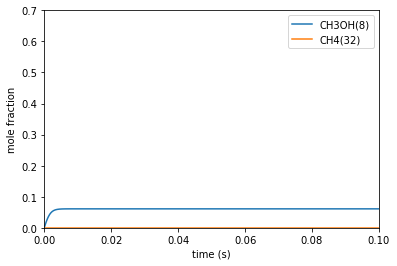

In [14]:
gas_specs = ["CH3OH(8)", "CH4(32)"]
for spec in gas_specs:
    plt.plot(times, results[spec], label = spec)
plt.legend()
plt.xlim(0,0.1)
plt.ylim(0,0.7)
plt.xlabel("time (s)")
plt.ylabel("mole fraction")

Text(0, 0.5, 'mole fraction')

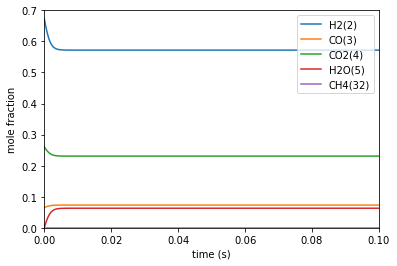

In [15]:
gas_specs = ["H2(2)","CO(3)","CO2(4)", "H2O(5)", "CH4(32)"]
for spec in gas_specs:
    plt.plot(times, results[spec], label = spec)
plt.legend()
plt.xlim(0,0.1)
plt.ylim(0,0.7)
plt.xlabel("time (s)")
plt.ylabel("mole fraction")

## plot surface species

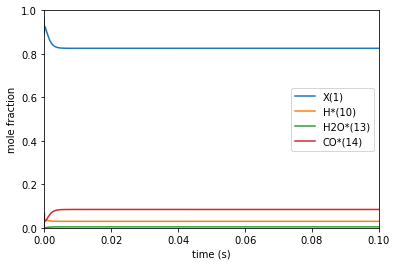

In [16]:
surf_specs = ["X(1)","H*(10)","H2O*(13)","CO*(14)"]
for spec in surf_specs:
    plt.plot(times, results[spec], label = spec)
plt.xlim(0,0.1)
plt.ylim(0,1.0)
plt.xlabel("time (s)")
plt.ylabel("mole fraction")
plt.legend()

# get sensitivity of time to output

In [1]:
import yaml
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
path = "/work/westgroup/ChrisB/_01_MeOH_repos/uncertainty_analysis/"
if path not in sys.path: 
    sys.path.append("/work/westgroup/ChrisB/_01_MeOH_repos/uncertainty_analysis/")
from rmg_gua.gua_cantera.Spinning_basket_reactor.sbr import MinSBR

expt_condts = f"{path}rmg_gua/gua_cantera/all_experiments_reorg_sbr.yaml"
with open(expt_condts, "r") as f: 
    data = yaml.safe_load(f)
conditions = data[73]

conditions["volume_flowrate"]

FC_temp = 293.15
conditions["molar_flow"] = conditions["volume_flowrate"] * 1.01325e5 / (8.3145 * FC_temp) 

In [16]:
times = [599, 600, 699]
for time in times:
    cti_file = f"{path}rmg_gua/baseline/cantera/chem_annotated.cti"
    reactor = MinSBR(
        cti_file,
        conditions,
        reactor_type=1,
        time=time, 
    )
    results = reactor.run_reactor_ss_memory()
    unreliable_tof_meoh = reactor.rsurf.kinetics.net_production_rates[reactor.gas.species_index(reactor.ch3oh_str)]/reactor.surf.site_density
    unreliable_tof_meoh += reactor.r.kinetics.net_production_rates[reactor.gas.species_index(reactor.ch3oh_str)]/reactor.surf.site_density
    unreliable_tof_h2o = reactor.rsurf.kinetics.net_production_rates[reactor.gas.species_index(reactor.h2o_str)]/reactor.surf.site_density
    unreliable_tof_h2o += reactor.r.kinetics.net_production_rates[reactor.gas.species_index(reactor.h2o_str)]/reactor.surf.site_density
    print("time {0} H2O TOF {1:.2e} 1/s".format(time, results["RMG H2O TOF 1/s"]))
    print("time {0} MeOH TOF {1:.2e} 1/s".format(time, results["RMG MeOH TOF 1/s"]))
    print("time {0} CH3OH mol frac {1:.2e}".format(time, results["CH3OH(8)"]))
    print("time {0} H2O mol frac {1:.2e}".format(time, results["H2O(5)"]))
    print("time {0} cantera MeOH ROP TOF {1:.2e} 1/s".format(time, unreliable_tof_meoh))
    print("time {0} cantera H2O ROP TOF {1:.2e} 1/s".format(time, unreliable_tof_h2o))
    print("*"*20)

time 599 H2O TOF 9.16e-02 1/s
time 599 MeOH TOF 1.74e-08 1/s
time 599 CH3OH mol frac 7.97e-08
time 599 H2O mol frac 4.19e-01
time 599 cantera MeOH ROP TOF -9.21e-07 1/s
time 599 cantera H2O ROP TOF 1.90e+02 1/s
********************
time 600 H2O TOF 9.16e-02 1/s
time 600 MeOH TOF 1.74e-08 1/s
time 600 CH3OH mol frac 7.97e-08
time 600 H2O mol frac 4.19e-01
time 600 cantera MeOH ROP TOF -2.99e-07 1/s
time 600 cantera H2O ROP TOF 6.52e+01 1/s
********************
time 699 H2O TOF 9.16e-02 1/s
time 699 MeOH TOF 1.74e-08 1/s
time 699 CH3OH mol frac 7.97e-08
time 699 H2O mol frac 4.19e-01
time 699 cantera MeOH ROP TOF 1.03e-06 1/s
time 699 cantera H2O ROP TOF 8.84e+02 1/s
********************


In [5]:
type(reactor(

array([0.00000000e+00, 0.00000000e+00, 4.91975995e-02, 3.12208612e-01,
       1.05014224e-02, 4.18689310e-01, 3.21315005e-11, 6.84814569e-09,
       7.96827872e-08, 1.73114716e-14, 2.09346861e-01, 2.92570285e-12,
       1.39416724e-10, 5.95908578e-11, 5.61092494e-05])

In [6]:
results["H2O(5)"]

0.418689309620083

In [5]:
conditions

{'catalyst_area': 44.424193000339805,
 'experiment_type': 'sbr',
 'expt_name': 'graaf_1988',
 'output': {'CH3OH': 0.010996734498125502, 'H2O': 0.0015494420427887203},
 'pressure': 5000000.0,
 'run_num': 74.0,
 'species': {'CO': 0.22, 'CO2': 0.155, 'H2': 0.625},
 'temperature': 516.7,
 'use_for_opt': False,
 'volume': 0.0001346957850226624,
 'volume_flowrate': 6.879999999999999e-06,
 'molar_flow': 0.0002860085488581988}

In [6]:
reactor.surf.site_density

2.943e-08

In [ ]:
results["H2O(5)"]*

In [12]:
moles_h2o_out = results["H2O(5)"] * conditions["molar_flow"]
print(moles_h2o_out, " moles/s")

0.00011974872186688103  moles/s


In [13]:
kmoles_sites = reactor.surf.site_density * conditions["catalyst_area"]
moles_sites = 
print(kmoles_sites, " kmoles sites")
print

1.3074040000000005e-06  kmoles sites


In [ ]:
TOF = moles_h2o_out/(kmoles_sites*1000)